# 📙 Análisis Avanzado de Datos - Nivel Avanzado

Portfolio Data Analyst - Nivel Avanzado

Este notebook centraliza la **carga y exploración de TODOS los datos importantes** del nivel avanzado:
- `banking/`
- `store_sales/`
- `brazilian_ecommerce/`

El objetivo es tener un punto de partida sólido para análisis avanzados (riesgo, forecasting, e-commerce complejo) y para mostrar tu trabajo en el portfolio.


In [89]:
# ✅ Configuración inicial y rutas de datos

from pathlib import Path
import pandas as pd

# Ruta base: carpeta del nivel avanzado (../ desde este notebook)
BASE_PATH = Path("..").resolve()  # .../Portfolio/03_Avanzado
DATA_AVANZADO = BASE_PATH / "data"

print("Base path (03_Avanzado):", BASE_PATH)
print("Data avanzado:", DATA_AVANZADO)

# Subcarpetas principales
BANKING_PATH = DATA_AVANZADO / "banking"
STORE_SALES_PATH = DATA_AVANZADO / "store_sales"
ECOM_PATH = DATA_AVANZADO / "brazilian_ecommerce"

BANKING_PATH, STORE_SALES_PATH, ECOM_PATH


Base path (03_Avanzado): C:\Users\andre\OneDrive\Documentos\Portfolio Python\Portfolio\03_Avanzado
Data avanzado: C:\Users\andre\OneDrive\Documentos\Portfolio Python\Portfolio\03_Avanzado\data


(WindowsPath('C:/Users/andre/OneDrive/Documentos/Portfolio Python/Portfolio/03_Avanzado/data/banking'),
 WindowsPath('C:/Users/andre/OneDrive/Documentos/Portfolio Python/Portfolio/03_Avanzado/data/store_sales'),
 WindowsPath('C:/Users/andre/OneDrive/Documentos/Portfolio Python/Portfolio/03_Avanzado/data/brazilian_ecommerce'))

In [90]:
# 🔧 Función auxiliar para cargar todos los CSV de una carpeta

from typing import Dict


def cargar_csvs_directorio(path: Path) -> Dict[str, pd.DataFrame]:
    """Carga todos los archivos CSV de un directorio en un diccionario {nombre: DataFrame}."""
    dataframes = {}
    if not path.exists():
        print(f"[AVISO] La ruta no existe: {path}")
        return dataframes

    for csv_file in path.glob("*.csv"):
        nombre = csv_file.stem
        print(f"Cargando {csv_file.name} ...")
        df = pd.read_csv(csv_file)
        dataframes[nombre] = df
        print(f"  -> {nombre}: {df.shape[0]} filas, {df.shape[1]} columnas")
    return dataframes


## 1. Datos de Banking

Objetivo: tener una vista clara de todos los datos bancarios (clientes, cuentas, transacciones, préstamos) para proyectos de **riesgo, churn y segmentación**.


In [91]:
# 📥 Carga de datos de Banking

banking_dfs = cargar_csvs_directorio(BANKING_PATH)

# Mostrar resumen rápido de cada tabla
for nombre, df in banking_dfs.items():
    print("\n" + "=" * 80)
    print(f"TABLA BANKING: {nombre}")
    print("Shape:", df.shape)
    print("Columnas:", df.columns.tolist())


Cargando banking_data.csv ...
  -> banking_data: 5000 filas, 18 columnas

TABLA BANKING: banking_data
Shape: (5000, 18)
Columnas: ['customer_id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


## 2. Datos de Store Sales (Series Temporales)

Objetivo: preparar los datos de `store_sales/` para proyectos de **forecasting de ventas y análisis temporal avanzado**.


In [92]:
# 📥 Carga de datos de Store Sales

store_dfs = cargar_csvs_directorio(STORE_SALES_PATH)

for nombre, df in store_dfs.items():
    print("\n" + "=" * 80)
    print(f"TABLA STORE_SALES: {nombre}")
    print("Shape:", df.shape)
    print("Columnas:", df.columns.tolist())


Cargando stores.csv ...
  -> stores: 50 filas, 5 columnas
Cargando train.csv ...
  -> train: 127858 filas, 5 columnas

TABLA STORE_SALES: stores
Shape: (50, 5)
Columnas: ['store_nbr', 'city', 'state', 'type', 'cluster']

TABLA STORE_SALES: train
Shape: (127858, 5)
Columnas: ['date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion']


## 3. Datos de Brazilian E-commerce

Objetivo: centralizar todas las tablas de e-commerce brasileño para proyectos end-to-end de **performance, logística, satisfacción y cohortes**.


In [93]:
# 📥 Carga de datos de Brazilian E-commerce

ecom_dfs = cargar_csvs_directorio(ECOM_PATH)

for nombre, df in ecom_dfs.items():
    print("\n" + "=" * 80)
    print(f"TABLA ECOMMERCE: {nombre}")
    print("Shape:", df.shape)
    print("Columnas:", df.columns.tolist())


Cargando customers.csv ...
  -> customers: 5000 filas, 5 columnas
Cargando orders.csv ...
  -> orders: 10000 filas, 8 columnas
Cargando order_items.csv ...
  -> order_items: 9991 filas, 7 columnas

TABLA ECOMMERCE: customers
Shape: (5000, 5)
Columnas: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

TABLA ECOMMERCE: orders
Shape: (10000, 8)
Columnas: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

TABLA ECOMMERCE: order_items
Shape: (9991, 7)
Columnas: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


## 4. Siguiente paso: conectar con PostgreSQL (opcional)

Si quieres llevar estos datos a una base analítica (por ejemplo `portfolio_avanzado`), puedes:

1. Definir una `DATABASE_URL` con tu usuario `postgres` y contraseña `123456`.
2. Crear funciones para enviar cada DataFrame a tablas PostgreSQL.
3. Usar esos DataFrames como base para proyectos avanzados de riesgo, forecasting y e-commerce.

Si quieres, en el siguiente paso puedo añadir en este mismo notebook la conexión a PostgreSQL y la carga automática de todas las tablas.


In [94]:
# 🔌 Conexión a base analítica local con SQLite (evita problemas de drivers)

from sqlalchemy import create_engine

# Usamos un archivo SQLite en la carpeta de 03_Avanzado
DB_PATH = BASE_PATH / "portfolio_avanzado.db"

engine = create_engine(f"sqlite:///{DB_PATH}")

print("Conectado a SQLite:", DB_PATH)


Conectado a SQLite: C:\Users\andre\OneDrive\Documentos\Portfolio Python\Portfolio\03_Avanzado\portfolio_avanzado.db


In [95]:
# 📤 Función auxiliar para enviar DataFrames a PostgreSQL (limpiando texto)

from sqlalchemy import text


def limpiar_texto(df: pd.DataFrame) -> pd.DataFrame:
    """Normaliza columnas de texto a UTF-8 para evitar errores de encoding."""
    df = df.copy()
    for col in df.select_dtypes(include=["object", "string"]).columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.encode("utf-8", errors="ignore")
            .str.decode("utf-8", errors="ignore")
        )
    return df


def cargar_dict_a_postgres(dfs: dict, prefix: str):
    """Envía cada DataFrame de un diccionario a PostgreSQL con un prefijo de tabla.
    Ej: prefix="banking" -> tablas banking_customers, banking_transactions, etc.
    """
    for nombre, df in dfs.items():
        table_name = f"{prefix}_{nombre}"
        print("\n" + "=" * 80)
        print(f"Cargando tabla {table_name} a PostgreSQL ...")
        df_limpio = limpiar_texto(df)
        df_limpio.to_sql(table_name, engine, if_exists="replace", index=False)
        with engine.connect() as conn:
            count = conn.execute(text(f"SELECT COUNT(*) FROM {table_name}"))
            print(f"  -> Filas en {table_name}:", count.scalar())


## 5. Cargar TODOS los datos a la base analítica (nivel avanzado)

En esta sección se envían todos los DataFrames a una base de datos analítica local `portfolio_avanzado.db` (SQLite) para trabajar como en un entorno profesional, sin depender de drivers de PostgreSQL:

- Tablas de banking → `banking_*`
- Tablas de store_sales → `store_*`
- Tablas de e-commerce → `ecom_*`


In [96]:
# 🚀 Enviar TODOS los datos a PostgreSQL

# IMPORTANTE: antes de ejecutar, asegúrate de crear la BD:
#   CREATE DATABASE portfolio_avanzado;

cargar_dict_a_postgres(banking_dfs, prefix="banking")
cargar_dict_a_postgres(store_dfs, prefix="store")
cargar_dict_a_postgres(ecom_dfs, prefix="ecom")



Cargando tabla banking_banking_data a PostgreSQL ...
  -> Filas en banking_banking_data: 5000

Cargando tabla store_stores a PostgreSQL ...
  -> Filas en store_stores: 50

Cargando tabla store_train a PostgreSQL ...
  -> Filas en store_train: 127858

Cargando tabla ecom_customers a PostgreSQL ...
  -> Filas en ecom_customers: 5000

Cargando tabla ecom_orders a PostgreSQL ...
  -> Filas en ecom_orders: 10000

Cargando tabla ecom_order_items a PostgreSQL ...
  -> Filas en ecom_order_items: 9991


## 6. Gráficos clave (nivel avanzado)

A continuación se incluyen algunos gráficos que puedes ejecutar y luego exportar como imágenes para tu portfolio:

- Distribución de saldos (banking)
- Evolución temporal de ventas (store_sales)
- Top categorías / productos (e-commerce)

La idea es que estos sean **gráficos profesionales**, fáciles de explicar en entrevistas.


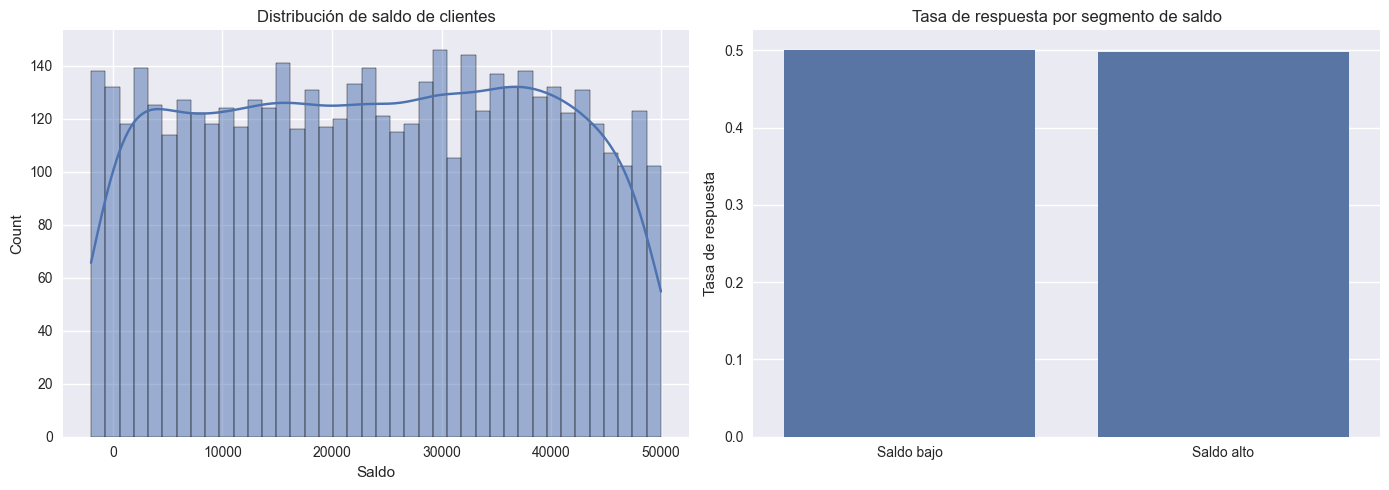

In [97]:
# 📊 Banking: distribución de saldo y tasa de respuesta

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

banking = banking_dfs.get("banking_data").copy()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribución de saldo
sns.histplot(banking["balance"], bins=40, kde=True, ax=axes[0])
axes[0].set_title("Distribución de saldo de clientes")
axes[0].set_xlabel("Saldo")

# Tasa de respuesta por saldo alto/bajo (ejemplo simple)
# Convertimos y ('yes'/'no') a 1/0 para poder sacar la media
banking["y_bin"] = banking["y"].map({"yes": 1, "no": 0}).astype(float)

banking["saldo_alto"] = banking["balance"] > banking["balance"].median()
resp_por_segmento = (
    banking
    .groupby("saldo_alto")["y_bin"]
    .mean()
    .reset_index()
)
resp_por_segmento["segmento"] = resp_por_segmento["saldo_alto"].map(
    {False: "Saldo bajo", True: "Saldo alto"}
)

sns.barplot(data=resp_por_segmento, x="segmento", y="y_bin", ax=axes[1])
axes[1].set_title("Tasa de respuesta por segmento de saldo")
axes[1].set_ylabel("Tasa de respuesta")
axes[1].set_xlabel("")

plt.tight_layout()
plt.show()

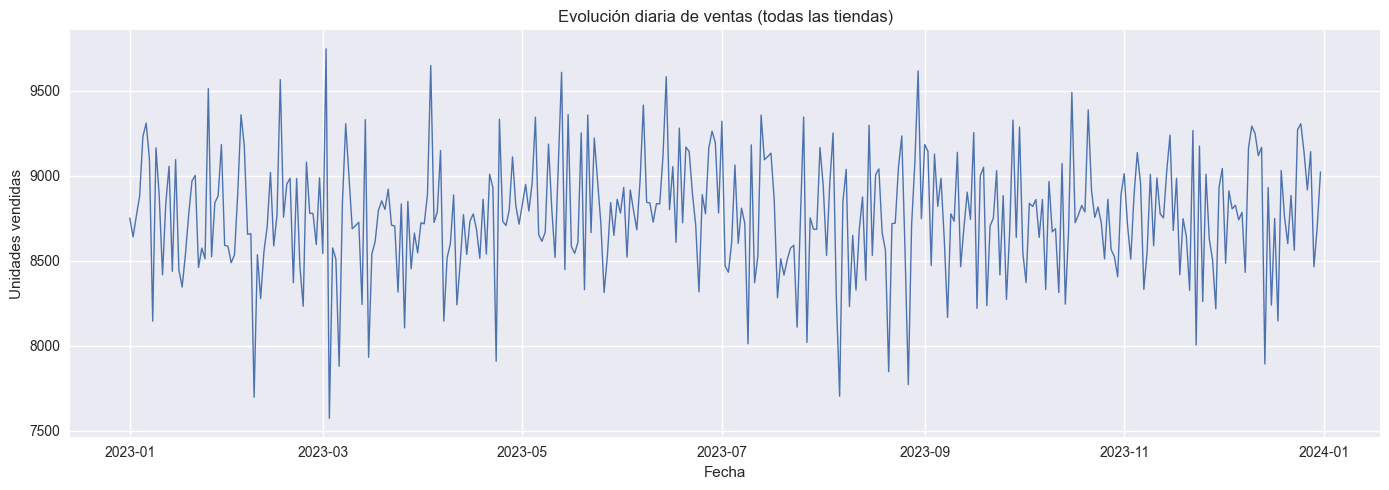

In [98]:
# ⏱️ Store Sales: evolución temporal de ventas

train = store_dfs.get("train").copy()
train["date"] = pd.to_datetime(train["date"])

ventas_diarias = (
    train
    .groupby("date")["unit_sales"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(14, 5))
plt.plot(ventas_diarias["date"], ventas_diarias["unit_sales"], linewidth=1)
plt.title("Evolución diaria de ventas (todas las tiendas)")
plt.xlabel("Fecha")
plt.ylabel("Unidades vendidas")
plt.tight_layout()
plt.show()


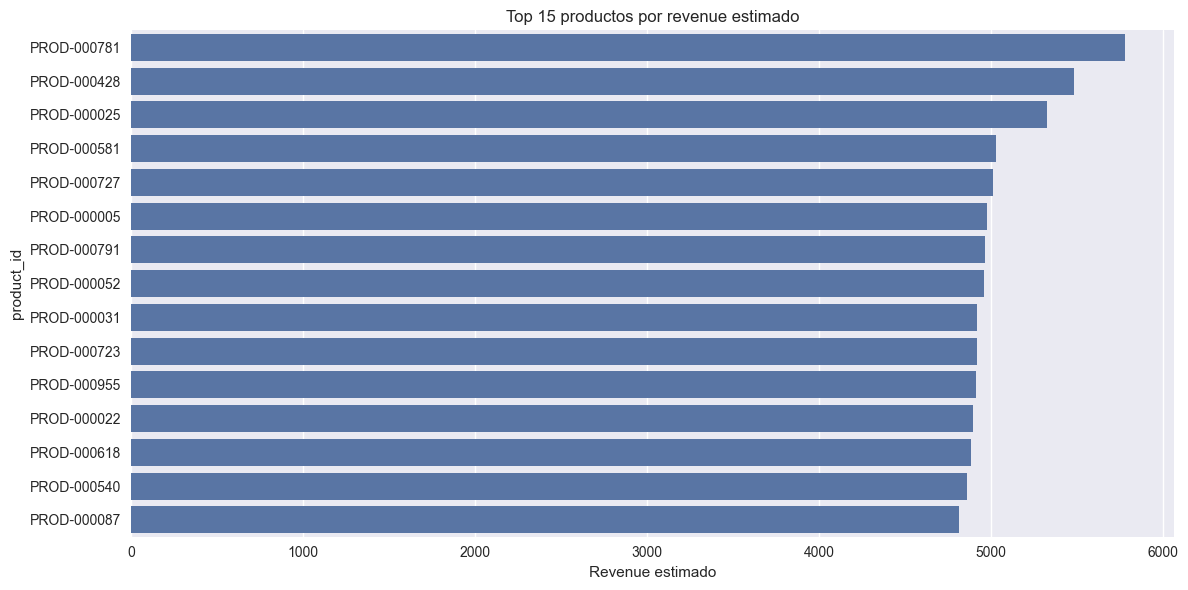

In [99]:
# 🛒 E-commerce: top productos por revenue aproximado

orders = ecom_dfs.get("orders").copy()
items = ecom_dfs.get("order_items").copy()

# Merge simple para estimar revenue por producto
items_agg = (
    items
    .groupby("product_id")["price"]
    .sum()
    .reset_index()
    .rename(columns={"price": "revenue_est"})
)

# Tomamos top 15
top_prod = items_agg.sort_values("revenue_est", ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_prod, x="revenue_est", y="product_id", orient="h")
plt.title("Top 15 productos por revenue estimado")
plt.xlabel("Revenue estimado")
plt.ylabel("product_id")
plt.tight_layout()
plt.show()
